In [1]:
# из библиотеки google.colab импортируем класс files
from google.colab import files
# создаем объект этого класса, применяем метод .upload()
#Нам будет предложено выбрать файл на жестком диске.
uploaded = files.upload()
for k, v in uploaded.items():
    open(k, 'wb').write(v) 
list(uploaded.keys())


Saving A.H.1.jpg to A.H.1.jpg


['A.H.1.jpg']

In [2]:
FileNameJPG="A.H.1.jpg"
#FileNameJPG="A.H.2.jpg"
#FileNameJPG="pict10_10.jpg" слишком маленький файл

Fitting model on a small sub-sample of the data
Clustering (predicting) for the full image (on kmeans-Model)
Predicting color indices on the full image (random)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


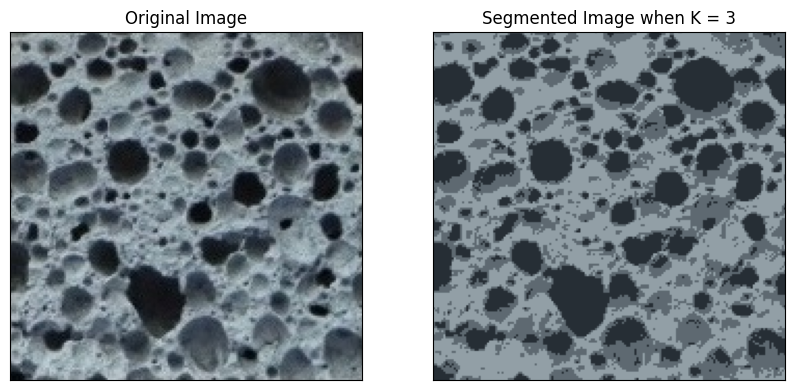

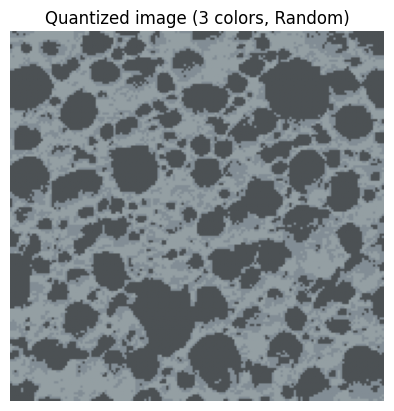

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

import cv2  # собственно OpenCV
img = cv2.imread(FileNameJPG,1)

n_colors = 3

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
img = np.array(img, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)
# print('w h d')
# print(w,h,d)


assert d == 3
image_array = np.reshape(img, (w * h, d))
# print('image_array')
# print(len(image_array))
# print(image_array)


#Подгонка модели кластеризации к небольшой подвыборке данных
print("Fitting model on a small sub-sample of the data")
image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
# print('image_array_sample')
# print(len(image_array_sample))
# print(image_array_sample)

#kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0)
kmeans = KMeans(n_clusters=n_colors,random_state=0)
kmeans.fit(image_array_sample)

#Кластеризация (использование обученной модели) на полном изображении 
#Предсказание цветовых индикаторов на полной модели
# Get labels for all points
print("Clustering (predicting) for the full image (on kmeans-Model)")
labels = kmeans.predict(image_array)

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.title('Segmented Image when K = %i' % n_colors), plt.xticks([]), plt.yticks([])
plt.show()


plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()